In [ ]:
%matplotlib nbagg

In [1]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pandas as pd
import numpy as np

In [2]:
value_df = pd.read_csv("in/animation/ConstFourrooms-v0-0-0.csv", index_col=0)
value_df

,state,v,v_z,F,z,episode,step,reward
0,1,0.000000,0.000000,0.00000,0,0,0,0.0
1,0,0.000000,0.000000,0.00000,0,0,1,0.0
2,1,0.000000,0.000000,0.00000,0,0,2,0.0
3,1,0.000000,0.000000,0.00000,0,0,3,0.0
4,0,0.000000,0.000000,0.00000,0,0,4,0.0
...,...,...,...,...,...,...,...,...
999015,80,0.932826,0.950990,-0.00951,2,999,15,0.0
999016,81,0.951855,0.950990,-0.00951,2,999,16,0.0
999017,92,0.971075,0.950990,-0.00951,2,999,17,0.0
999018,102,0.990490,0.950990,-0.00951,2,999,18,0.0


In [3]:
group_value_df = value_df.groupby(["episode", "z"]).agg({"v_z":max})
group_value_df

v_z
episode z          
0       0  0.000000
        1  0.000000
        2  0.000000
1       0  0.000000
        1  0.000000
...             ...
998     1  0.886385
        2  0.950990
999     0  0.817907
        1  0.886385
        2  0.950990

[2989 rows x 1 columns]

In [4]:
group_value_df.xs(500, level="episode")

,v_z
z,
0,0.817907
1,0.886385
2,0.950990


In [5]:
# 学習後の軌跡に含まれる状態系列
last_episode = value_df["episode"].max()
states_last_episode = value_df[value_df["episode"] == last_episode]["state"].values.tolist()[:-1]
states_last_episode

[10, 11, 21, 22, 23, 24, 25, 26, 27, 37, 47, 53, 54, 62, 70, 80, 81, 92, 102]

In [6]:
z_value_df = group_value_df.reset_index()
z_value_df = z_value_df.pivot(index="episode", columns="z", values="v_z")
z_value_df = z_value_df.fillna(method="ffill")
z_value_df

z,0,1,2
episode,,,
0,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000
3,0.000146,0.001546,0.000000
4,0.000146,0.001160,0.000189
...,...,...,...
995,0.817907,0.886385,0.950990
996,0.817907,0.886385,0.950990
997,0.817907,0.886385,0.950990


0.8179068349745544 0.8863848677396273 0.9509900498609009


<BarContainer object of 30 artists>

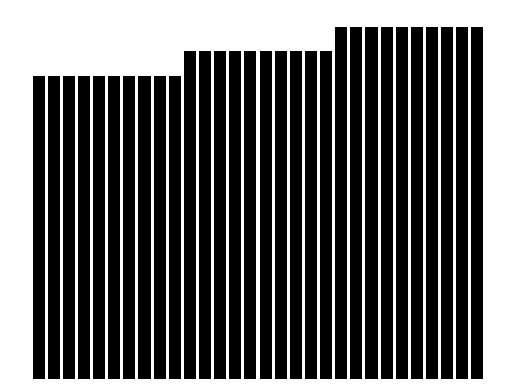

In [14]:
fig, ax = plt.subplots()
x = np.arange(30)
v_0, v_1, v_2 = z_value_df.values.tolist()[100]
print(v_0, v_1, v_2)
series1 = np.full(10, v_0)
series2 = np.full(10, v_1)
series3 = np.full(10, v_2)
y = np.hstack([series1, series2, series3])
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)
ax.bar(x, y, color='black')

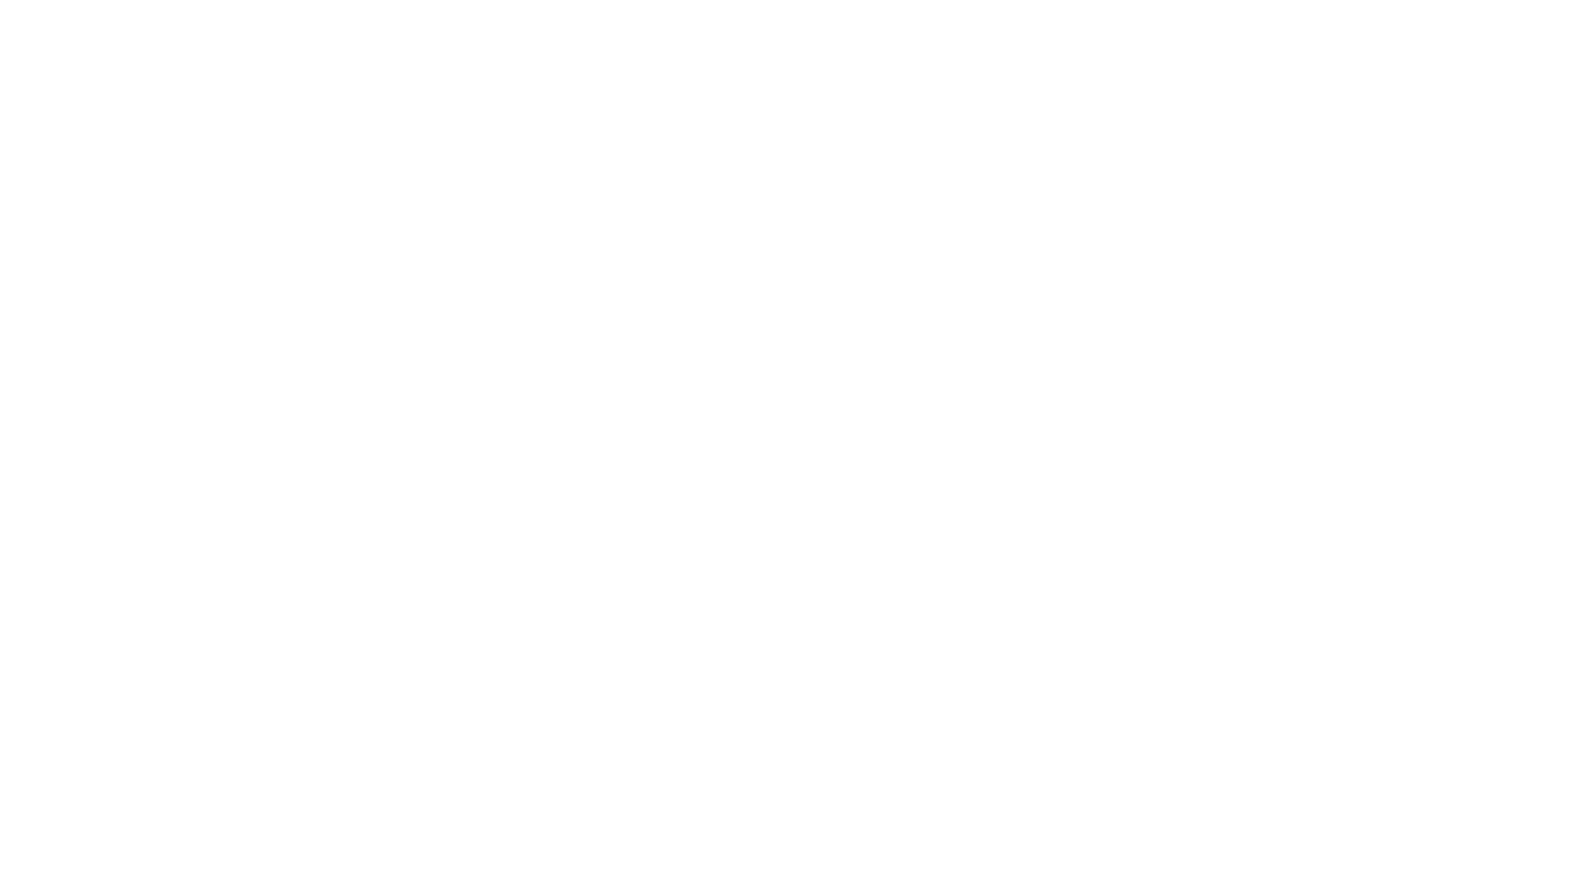

In [17]:
width = 20
fig, ax = plt.subplots(figsize=(width, width / 1.776))
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)
graphs = []
x = np.arange(30)

for v_0, v_1, v_2 in z_value_df.values.tolist()[:60]:
    series1 = np.full(10, v_0)
    series2 = np.full(10, v_1)
    series3 = np.full(10, v_2)
    y = np.hstack([series1, series2, series3])
    im = plt.bar(x, y, color='black')
    graphs.append(im)

ani = animation.ArtistAnimation(fig, graphs, interval=10)
ani.save("dynamic_potential.gif", writer="imagemagick")
# plt.show()